In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
import keras
from tensorflow.keras import layers

# Loading & visualizing the data

In [2]:
df = pd.read_csv('Microsoft_Stock.csv', parse_dates = ['Date'])
df

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012


In [17]:
df.set_index('Date', inplace = True)

In [18]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [19]:
cols = ['Open', 'High', 'Low', 'Close']

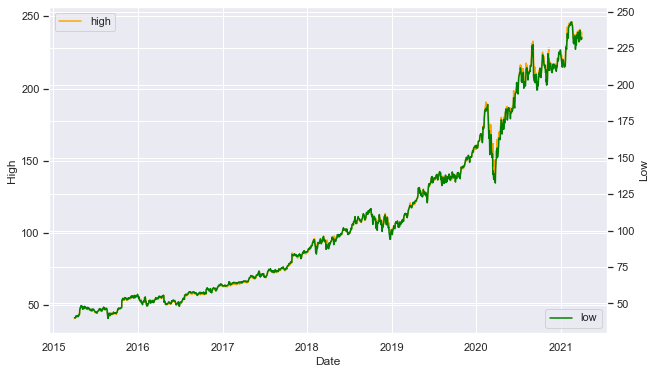

In [21]:
fig, ax1 = plt.subplots(1,1, figsize = (10,6))
ax2 = ax1.twinx()
ax1.plot(df['High'], label = 'high', color = 'orange')
ax2.plot(df['Low'], label = 'low', color = 'green')
ax1.set_xlabel('Date')
ax1.set_ylabel('High')
ax2.set_ylabel('Low')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show()


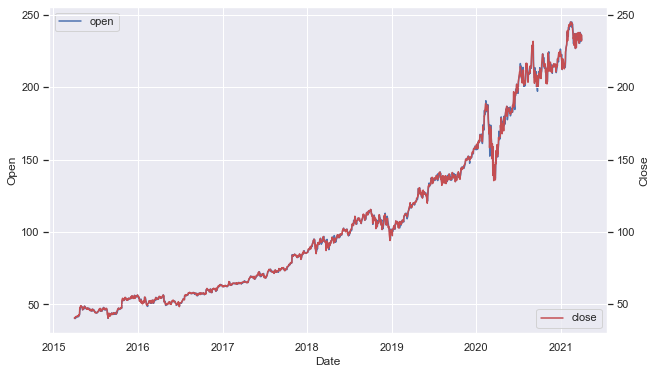

In [22]:
fig, ax1 = plt.subplots(1,1, figsize = (10,6))
ax2 = ax1.twinx()
ax1.plot(df['Open'], label = 'open', color = 'b')
ax2.plot(df['Close'], label = 'close', color = 'r')
ax1.set_xlabel('Date')
ax1.set_ylabel('Open')
ax2.set_ylabel('Close')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show()

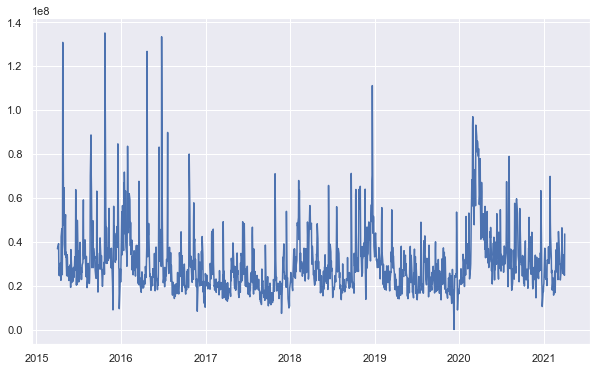

In [23]:
plt.figure(figsize = (10, 6))
plt.plot(df['Volume'])

# Preparing the training data

In [4]:
train_len = int(len(df)*0.8)
train_len

1208

In [5]:
df_train = df.iloc[0:train_len, :]
df_train.shape

(1208, 6)

In [6]:
df_test = df.iloc[train_len:, :]
df_test.shape

(303, 6)

In [7]:
Xtrain = df_train['Close'].values

In [9]:
scaler = MinMaxScaler(feature_range = (0, 1))
Xtrain_sc = scaler.fit_transform(Xtrain.reshape(-1, 1))
Xtrain_sc.shape

(1208, 1)

In [10]:
Xtrain_f = []
Ytrain_f = []
time_step = 60

for i in range(time_step, len(Xtrain_sc)):
    Xtrain_f.append(Xtrain_sc[i - time_step: i, 0])
    Ytrain_f.append(Xtrain_sc[i, 0])
    
Xtrain_f = np.array(Xtrain_f)
Ytrain_f = np.array(Ytrain_f)

In [11]:
Xtrain_f = Xtrain_f.reshape(Xtrain_f.shape[0], Xtrain_f.shape[1], 1)
Xtrain_f.shape

(1148, 60, 1)

In [13]:
model = keras.Sequential([
    
    layers.LSTM(units = 100, return_sequences = True, input_shape = (Xtrain_f.shape[1], 1)),
    layers.Dropout(0.2),
    
    layers.LSTM(units = 100, return_sequences = True),
    layers.Dropout(0.2),
    
    layers.LSTM(units = 100, return_sequences = True),
    layers.Dropout(0.2),
    
    layers.LSTM(units = 100, return_sequences = False),
    layers.Dropout(0.2),
    
    layers.Dense(units = 1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [15]:
hist = model.fit(Xtrain_f, Ytrain_f, epochs = 20, batch_size = 32)
hist

Epoch 1/20
36/36 [==============================] - 32s 321ms/step - loss: 0.0180
Epoch 2/20
36/36 [==============================] - 11s 294ms/step - loss: 0.0017
Epoch 3/20
36/36 [==============================] - 11s 310ms/step - loss: 0.0017
Epoch 4/20
36/36 [==============================] - 10s 280ms/step - loss: 0.0017
Epoch 5/20
36/36 [==============================] - 10s 286ms/step - loss: 0.0014
Epoch 6/20
36/36 [==============================] - 11s 297ms/step - loss: 0.0016
Epoch 7/20
36/36 [==============================] - 12s 319ms/step - loss: 0.0018
Epoch 8/20
36/36 [==============================] - 10s 284ms/step - loss: 0.0016
Epoch 9/20
36/36 [==============================] - 10s 279ms/step - loss: 0.0017
Epoch 10/20
36/36 [==============================] - 10s 282ms/step - loss: 0.0014
Epoch 11/20
36/36 [==============================] - 10s 283ms/step - loss: 0.0017
Epoch 12/20
36/36 [==============================] - 10s 280ms/step - loss: 0.0013
Epoch 13/20
3

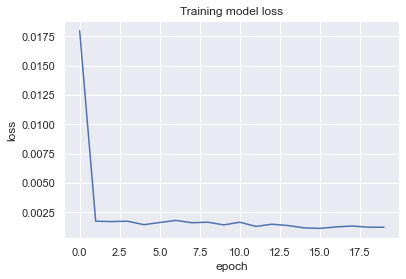

In [36]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [17]:
Ytrain_pred = model.predict(Xtrain_f)

36/36 [==============================] - 8s 102ms/step


In [18]:
Ytrain_pred = scaler.inverse_transform(Ytrain_pred)

In [19]:
Ytrain_actual = Xtrain[time_step: ]

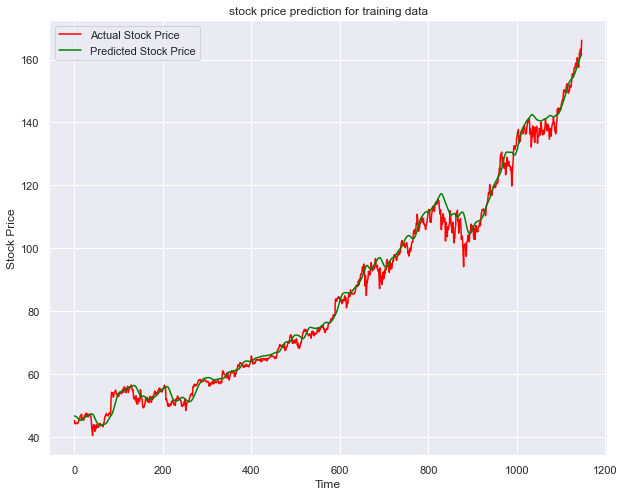

In [22]:
#plotting prediction for training data
plt.figure(figsize = (10, 8))
plt.plot(Ytrain_actual, color = 'red', label = 'Actual Stock Price')
plt.plot(Ytrain_pred, color = 'green', label = 'Predicted Stock Price')
plt.title('stock price prediction for training data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Preparing the testing data

In [23]:
Xtest = df_test['Close'].values

In [24]:
Xtest_sc = scaler.transform(Xtest.reshape(-1, 1))
len(Xtest_sc)

303

In [27]:
Xtest_f = []

time_step = 60
for i in range(time_step, len(Xtest_sc)):
    Xtest_f.append(Xtest_sc[i - time_step: i, 0])
    
Xtest_f = np.array(Xtest_f)

In [28]:
Xtest_f = Xtest_f.reshape(Xtest_f.shape[0], Xtest_f.shape[1], 1)
Xtest_f.shape

(243, 60, 1)

In [29]:
Ypred = model.predict(Xtest_f)


8/8 [==============================] - 1s 97ms/step


In [30]:
Ypred_trans = scaler.inverse_transform(Ypred)

In [31]:
Ytest = Xtest[time_step: ]

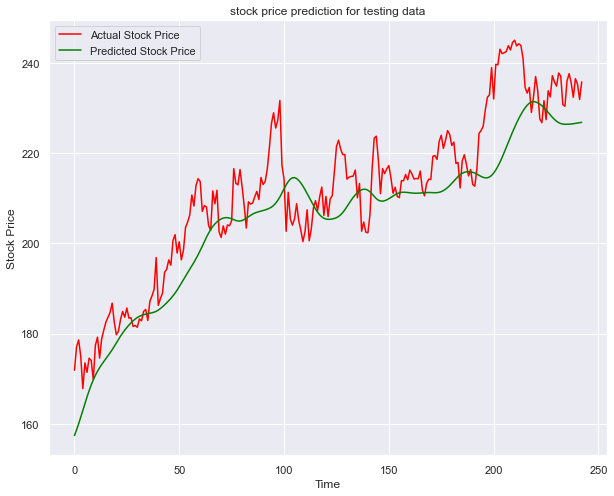

In [35]:
plt.figure(figsize = (10, 8))
plt.plot(Ytest, color = 'red', label = 'Actual Stock Price')
plt.plot(Ypred_trans, color = 'green', label = 'Predicted Stock Price')
plt.title('stock price prediction for testing data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [34]:
r2_score(Ytest, Ypred_trans)

0.7308223527128166